In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install wandb

In [3]:

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import wandb
wandb.login(key="1b74d87eef0c8dff900595f1526e95e162049f6a")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: cs23m071 (cs23m071-indian-institute-of-technology-madras). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
# (train_imgs, train_lbls), (test_imgs, test_lbls) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Question 1

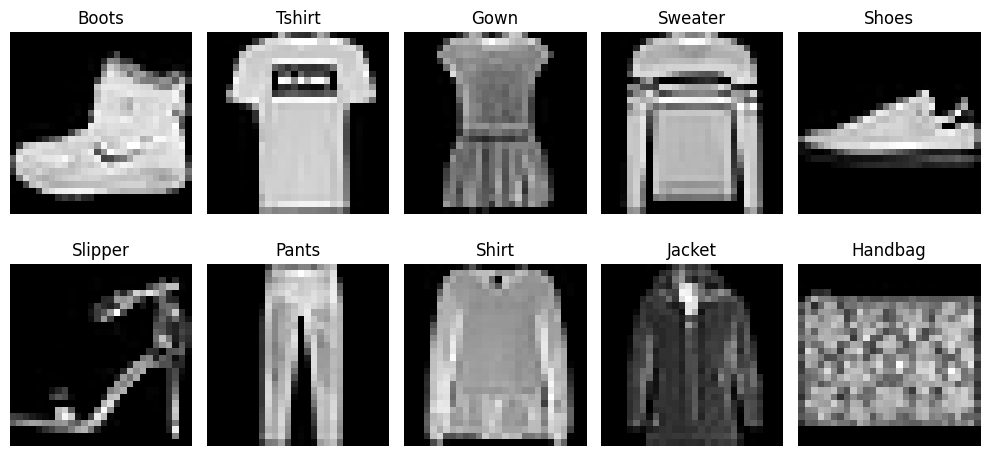

In [5]:
class_names = ['Tshirt', 'Pants', 'Sweater', 'Gown', 'Jacket',  
               'Slipper', 'Shirt', 'Shoes', 'Handbag', 'Boots']  

# Create a figure
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Track found classes
found_classes = {}

# Iterate over dataset and select one sample per class
for i, (image, label) in enumerate(zip(train_images, train_labels)):
    if label not in found_classes:
        found_classes[label] = image
        if len(found_classes) == 10:  # Stop when all 10 classes are found
            break

# Plot the images
for i, (label, image) in enumerate(found_classes.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
wandb.init(project="Deep Learning Course DA6401", name="Question 1")
wandb_images = []

for label, image in found_classes.items():
    wandb_images.append(wandb.Image(image, caption=class_names[label]))

# Log images to WandB
wandb.log({"Fashion-MNIST Samples": wandb_images})

# Finish WandB logging
wandb.finish()
# input()

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250310_061717-xqm3m9zz
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Question 1
wandb: ⭐️ View project at https://wandb.ai/cs23m071-indian-institute-of-technology-madras/Deep%20Learning%20Course%20DA6401
wandb: 🚀 View run at https://wandb.ai/cs23m071-indian-institute-of-technology-madras/Deep%20Learning%20Course%20DA6401/runs/xqm3m9zz
wandb:                                                                                
wandb: 🚀 View run Question 1 at: https://wandb.ai/cs23m071-indian-institute-of-technology-madras/Deep%20Learning%20Course%20DA6401/runs/xqm3m9zz
wandb: ⭐️ View project at: https://wandb.ai/cs23m071-indian-institute-of-technology-madras/Deep%20Learning%20Course%20DA6401
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 10 other file(s)
wandb: Find logs at: ./wandb/run-20250310_061717-xqm3m9zz/logs


# Question 2

In [7]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

train_labels_one_hot = one_hot_encode(train_labels)
test_labels_one_hot = one_hot_encode(test_labels)

